📊 Player Dataset Preview:
      Player  Matches_Played  Batting_Average  Strike_Rate  Balls_Faced  Runs
0  Player_39             124        23.205373    94.772062           56    12
1  Player_52              25        52.105975    91.806833           28    14
2  Player_29             142        24.788652    99.461640          135    33
3  Player_15             105        53.258307   157.418058          148    78
4  Player_43             103        35.610202   128.467068           58    20

📈 Regression Model Performance:
Mean Squared Error: 19.51799970347038
R² Score: 0.9375399306913945


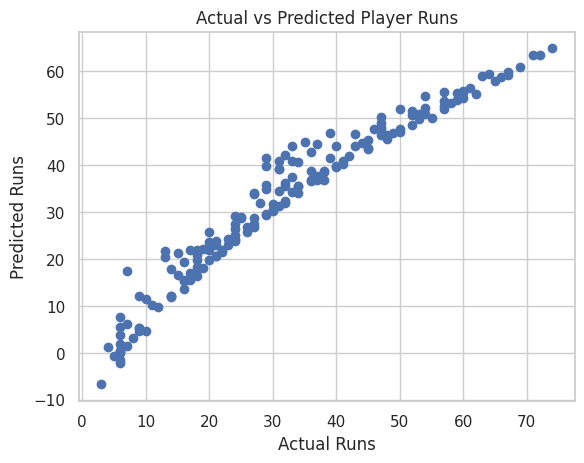


🏏 Match Dataset Preview:
   Team_Avg_Runs  Team_Avg_Wickets  Team_Batting_Avg  Team_Economy_Rate  \
0            208                 6         30.518454           8.953578   
1            143                 8         40.371627           8.598023   
2            148                 7         29.525449           6.587351   
3            183                 5         38.847086           6.421273   
4            149                 7         29.666656           6.236617   

   Home_Match  Match_Won  
0           0          1  
1           0          0  
2           1          0  
3           1          1  
4           0          0  

🏆 Classification Model Performance:
Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        71
           1       1.00      1.00      1.00        92

    accuracy                           1.00       163
   macro avg       1.00      1.00      1.00       163
weighted avg 

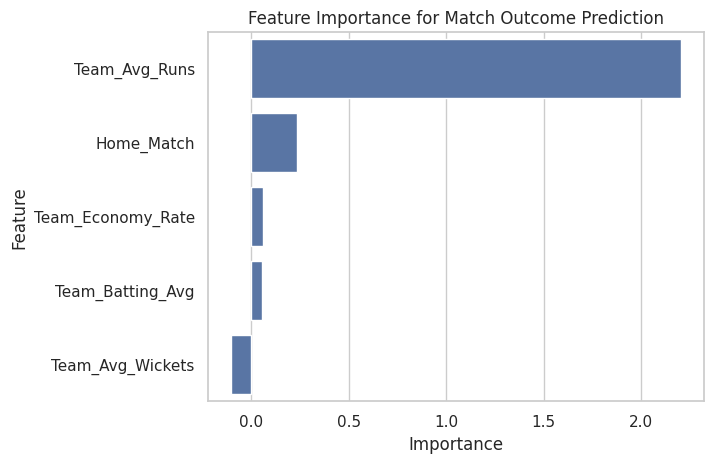

In [1]:
# ------------------------------------------------------------------
# Practical no 9 : Predictive Modeling in Sports (Cricket)
# ------------------------------------------------------------------

# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report

sns.set(style="whitegrid")

# ------------------------------------------------------------------
# PART A: REGRESSION MODEL – Predict Player Runs
# ------------------------------------------------------------------

# Step 1: Create a large synthetic player performance dataset
np.random.seed(42)

players = [f"Player_{i}" for i in range(1, 61)]
records = 700   # Large dataset

player_data = {
    "Player": np.random.choice(players, records),
    "Matches_Played": np.random.randint(5, 150, records),
    "Batting_Average": np.random.uniform(20, 55, records),
    "Strike_Rate": np.random.uniform(90, 160, records),
    "Balls_Faced": np.random.randint(10, 150, records),
}

df_players = pd.DataFrame(player_data)

# Target variable: Runs scored
df_players["Runs"] = (
    df_players["Batting_Average"] *
    (df_players["Balls_Faced"] / 100)
).astype(int)

print("📊 Player Dataset Preview:")
print(df_players.head())

# ------------------------------------------------------------------
# Step 2: Prepare data for regression
# ------------------------------------------------------------------

X = df_players[["Matches_Played", "Batting_Average", "Strike_Rate", "Balls_Faced"]]
y = df_players["Runs"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

# Step 3: Train Linear Regression model
reg_model = LinearRegression()
reg_model.fit(X_train, y_train)

# Step 4: Predictions & evaluation
y_pred = reg_model.predict(X_test)

print("\n📈 Regression Model Performance:")
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

# Visualization: Actual vs Predicted Runs
plt.figure()
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Runs")
plt.ylabel("Predicted Runs")
plt.title("Actual vs Predicted Player Runs")
plt.show()

# ------------------------------------------------------------------
# PART B: CLASSIFICATION MODEL – Predict Match Outcome
# ------------------------------------------------------------------

# Step 1: Create large match-level dataset
teams = ["MI", "CSK", "RCB", "KKR", "RR", "SRH"]
matches = 650

match_data = {
    "Team_Avg_Runs": np.random.randint(130, 210, matches),
    "Team_Avg_Wickets": np.random.randint(4, 9, matches),
    "Team_Batting_Avg": np.random.uniform(25, 45, matches),
    "Team_Economy_Rate": np.random.uniform(6.0, 9.5, matches),
    "Home_Match": np.random.choice([0, 1], matches),
}

df_matches = pd.DataFrame(match_data)

# Target variable: Match outcome (1 = Win, 0 = Loss)
df_matches["Match_Won"] = np.where(
    df_matches["Team_Avg_Runs"] > 165, 1, 0
)

print("\n🏏 Match Dataset Preview:")
print(df_matches.head())

# ------------------------------------------------------------------
# Step 2: Prepare data for classification
# ------------------------------------------------------------------

X_cls = df_matches.drop("Match_Won", axis=1)
y_cls = df_matches["Match_Won"]

X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(
    X_cls, y_cls, test_size=0.25, random_state=42
)

# Step 3: Train Logistic Regression model
clf_model = LogisticRegression(max_iter=1000)
clf_model.fit(X_train_c, y_train_c)

# Step 4: Predictions & evaluation
y_pred_c = clf_model.predict(X_test_c)

print("\n🏆 Classification Model Performance:")
print("Accuracy:", accuracy_score(y_test_c, y_pred_c))
print("\nClassification Report:\n", classification_report(y_test_c, y_pred_c))

# Visualization: Feature impact (coefficients)
coefficients = pd.DataFrame({
    "Feature": X_cls.columns,
    "Importance": clf_model.coef_[0]
}).sort_values(by="Importance", ascending=False)

plt.figure()
sns.barplot(data=coefficients, x="Importance", y="Feature")
plt.title("Feature Importance for Match Outcome Prediction")
plt.show()
